In [1]:
import ROOT
%jsroot on

Welcome to JupyROOT 6.14/04


In [2]:
f = ROOT.TFile.Open("Input/mc_147770.Zee.root")

In [3]:
tree = f.Get("mini")
print "There are " + str(tree.GetEntries()) + " in the tree"
##---- Uncomment to print the tree ----##
## this contains information on the branches
## available
#tree.Print()


There are 7500000 in the tree


In [4]:
hist = ROOT.TH1F("variable","Mass of the Z boson; mass [GeV]; events",30,40,140)
hist.SetFillColor(1)


In [33]:
n_events = 0
for event in tree:
    n_events = n_events + 1
    if n_events <=2000 :
        if tree.lep_n == 2:
            if tree.lep_charge[0] != tree.lep_charge[1]:
                if tree.lep_type[0] == tree.lep_type[1]:
                    # You can also use a TLorentzVector object
                    # which helps in vector manipulation
                    lep_pt_0  = tree.lep_pt[0]/1000.
                    lep_eta_0 = tree.lep_eta[0]
                    lep_phi_0 = tree.lep_phi[0]
                    lep_E_0   = tree.lep_E[0]/1000.
                
                    lep_px_0  = lep_pt_0*ROOT.TMath.Cos(lep_phi_0)
                    lep_py_0  = lep_pt_0*ROOT.TMath.Sin(lep_phi_0)
                    lep_pz_0  = lep_pt_0*ROOT.TMath.ASinH(lep_eta_0)
                        
                    lep_pt_1  = tree.lep_pt[1]/1000.
                    lep_eta_1 = tree.lep_eta[1]
                    lep_phi_1 = tree.lep_phi[1]
                    lep_E_1   = tree.lep_E[1]/1000.
          
                    lep_px_1  = lep_pt_1*ROOT.TMath.Cos(lep_phi_1)
                    lep_py_1  = lep_pt_1*ROOT.TMath.Sin(lep_phi_1)
                    lep_pz_1  = lep_pt_1*ROOT.TMath.ASinH(lep_eta_1)
                    
                    tot_E    = lep_E_0 + lep_E_1
                    tot_px   = lep_px_0 + lep_px_1
                    tot_py   = lep_py_0 + lep_py_1
                    tot_pz   = lep_pz_0 + lep_pz_1
                
                    invMass = ROOT.TMath.Sqrt(ROOT.TMath.Power(tot_E,2)-(ROOT.TMath.Power(tot_px,2)+ROOT.TMath.Power(tot_py,2)+ROOT.TMath.Power(tot_pz,2)))

                    hist.Fill(invMass)

print("Done!")

Done!


In [34]:
canvas = ROOT.TCanvas("Canvas","Canvas to plot variable",800,600)
hist.SetFillColor(2)
hist.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


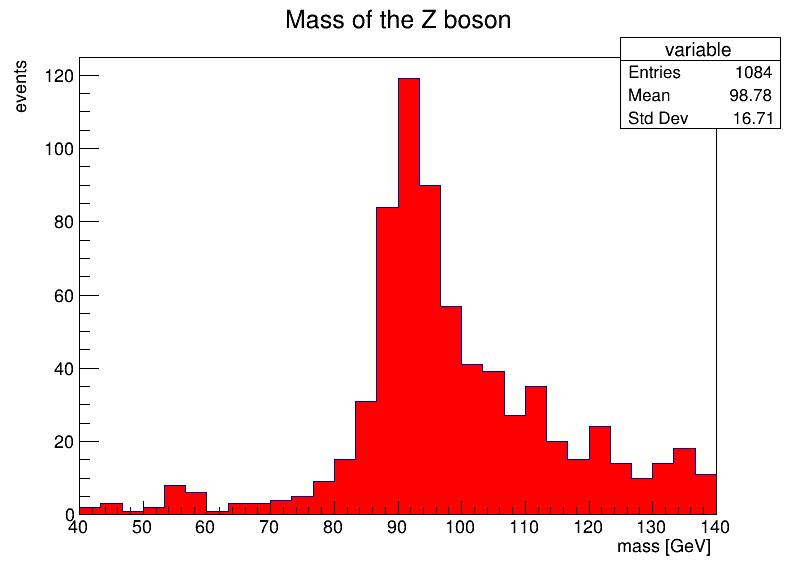

In [19]:
canvas.Draw()